# Librerias

Se cargan las librerías que nos pemitiran hacer los análisis

In [1]:
# Librerias
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib
from matplotlib.ticker import ScalarFormatter
import seaborn as sns
import math
import itertools

# Llamar process

Para crear las variables sinteticas, se crea un process que crea distintos grupos de variables, por un lado, se encuentran las variables de saldos pendientes, el transfondo de este process es crear variables que vean el comportamiento de los saldos pendientes para cada cliente, se crean:

    1. mora_max
    2. num_facturas
    3. valor_facturas
    4. prom_facturas
    5. cupo_max
    6. porcentaje_uso_cupo

Estas variables se calculan para la fecha de corte, 3 meses, 6 meses y 12 meses, esto nos permitirá conocer si ha variado el saldo pendiente de cada cliente, lo que podrá explicar su vencimiento para el próximo mes.

Por otro lado, está el process de comportamiento moroso, en este se calcula el comportamiento en los vencimientos por cliente, se categorizan los clientes de acuerdo a un año movil, se parte el año movil en 2 semestres y se hacen las siguientes condiciones:

    1. Si el cliente tiene mejor comportamiento de pago en el primer semestre que en el segundo, este será *incremental*.
    2. Si el cliente tiene mejor comportamiento de pago en el segundo semestre que en el primero, este será *decreciente*.
    3. Si el cliente nunca tiene un vencimiento, será comportamiento sano.
    4. Si el cliente siempre tiene un vencimiento, será comportamiento constante.
    5. Si el cliente se vence un mes y otro no, será comportamiento intermitente.

Por último, está el comportamiento de pago, en este se categorizan la cantidad de facturas por cantidad de días:

    1. Si la factura se paga día antes será pronto pago.
    2. Si la factura se paga el mismo días será día pago.
    3. Si la factura se paga entre el 1 día de vencimiento y menor a 5 días, será olvido pago.
    4. Si la factura se paga a 5 días después del vencimiento, será moroso pago.

Ahora se gestiona la categoría para el cliente de acuerdo a la mayoría de facturas de acuerdo a la categoría, por lo tanto, el cliente será categorizado con ese comportamiento.

In [2]:
# Llamando a las funciones
import process as pr

In [3]:
# saldos pendientes
saldos_pend = pr.process_saldos_pendientes(num=1)
df2 = pr.process_saldos_pendientes(num=3)
df3 = pr.process_saldos_pendientes(num=6)
df4 = pr.process_saldos_pendientes(num=12)
saldos_pend['nit'] = saldos_pend['nit'].astype(str)
df2['nit'] = df2['nit'].astype(str)
df3['nit'] = df3['nit'].astype(str)
df4['nit'] = df4['nit'].astype(str)
dfs = [df2,df3,df4]
for i in dfs:
    saldos_pend = pd.merge(saldos_pend, i , how='outer', on='nit')

INICIO PROCESS
Archivos a cargar:  ['C:/Users/Aleja/OneDrive/Escritorio/Icesi/I Semestre/Gestión estrategica/AlmanaConsultory/AlmanaConsultory/Información/saldos-pendientes/saldos_pendientes_202305.xlsx']
------------------------------------------------------------------------------------------------------------------------
Dimension base inicial: (4080, 30)
Facturas duplicadas base inicial: 0
------------------------------------------------------------------------------------------------------------------------
Distribucion por tipo_factura:  tipo_factura
F7Y    3516
P9Y     561
RE-       1
NDH       1
PRC       1
Name: count, dtype: int64
------------------------------------------------------------------------------------------------------------------------
Dimension base F7Y:  (3516, 31)
------------------------------------------------------------------------------------------------------------------------
Dimension base final agrupada por clientes (1097, 7)
Tiempo de ejecución:  0:

In [4]:
print(saldos_pend.shape)
saldos_pend.head()

(1439, 25)


,nit,mora_max_corte,num_facturas_corte,valor_facturas_corte,prom_facturas_corte,cupo_max_corte,porcentaje_uso_cupo_corte,mora_max_3m,num_facturas_3m,valor_facturas_3m,prom_facturas_3m,cupo_max_3m,porcentaje_uso_cupo_3m,mora_max_6m,num_facturas_6m,valor_facturas_6m,prom_facturas_6m,cupo_max_6m,porcentaje_uso_cupo_6m,mora_max_12m,num_facturas_12m,valor_facturas_12m,prom_facturas_12m,cupo_max_12m,porcentaje_uso_cupo_12m
0,10004337,0.0,7.0,11443080.0,1.634726e+06,10000000.0,114.430800,1.0,15.0,30856814.0,2.057121e+06,10000000.0,308.568140,4.0,23.0,43255859.0,1.880690e+06,10000000.0,432.558590,4,36,62284622.0,1.730128e+06,10000000.0,622.846220
1,1000575488,0.0,1.0,425079.0,4.250790e+05,10000000.0,4.250790,0.0,3.0,1376644.0,4.588813e+05,10000000.0,13.766440,5.0,9.0,3648672.0,4.054080e+05,10000000.0,36.486720,5,9,3648672.0,4.054080e+05,10000000.0,36.486720
2,10006035,0.0,3.0,2398149.0,7.993830e+05,8281160.0,28.959095,25.0,7.0,5470565.0,7.815093e+05,8281160.0,66.060371,96.0,14.0,11362214.0,8.115867e+05,8281160.0,137.205585,96,19,15347842.0,8.077812e+05,8281160.0,185.334446
3,1000790988,23.0,3.0,4930550.0,1.643517e+06,11600000.0,42.504741,23.0,4.0,7118477.0,1.779619e+06,11600000.0,61.366181,23.0,4.0,7118477.0,1.779619e+06,11600000.0,61.366181,23,4,7118477.0,1.779619e+06,11600000.0,61.366181
4,1000918720,34.0,2.0,5131057.0,2.565528e+06,30000000.0,17.103523,38.0,7.0,15394798.0,2.199257e+06,30000000.0,51.315993,38.0,14.0,33943808.0,2.424558e+06,30000000.0,113.146027,38,29,58025449.0,2.000878e+06,30000000.0,193.418163


In [5]:
# comportamiento moroso
moroso = pr.process_comportamiento_moroso()

INICIO PROCESS
Archivos utilizados:  ['C:/Users/Aleja/OneDrive/Escritorio/Icesi/I Semestre/Gestión estrategica/AlmanaConsultory/AlmanaConsultory/Información/saldos-pendientes/saldos_pendientes_202206.xlsx', 'C:/Users/Aleja/OneDrive/Escritorio/Icesi/I Semestre/Gestión estrategica/AlmanaConsultory/AlmanaConsultory/Información/saldos-pendientes/saldos_pendientes_202207.xlsx', 'C:/Users/Aleja/OneDrive/Escritorio/Icesi/I Semestre/Gestión estrategica/AlmanaConsultory/AlmanaConsultory/Información/saldos-pendientes/saldos_pendientes_202208.xlsx', 'C:/Users/Aleja/OneDrive/Escritorio/Icesi/I Semestre/Gestión estrategica/AlmanaConsultory/AlmanaConsultory/Información/saldos-pendientes/saldos_pendientes_202209.xlsx', 'C:/Users/Aleja/OneDrive/Escritorio/Icesi/I Semestre/Gestión estrategica/AlmanaConsultory/AlmanaConsultory/Información/saldos-pendientes/saldos_pendientes_202210.xlsx', 'C:/Users/Aleja/OneDrive/Escritorio/Icesi/I Semestre/Gestión estrategica/AlmanaConsultory/AlmanaConsultory/Informació

In [6]:
print(moroso.shape)
moroso.head()

(1439, 22)


,nit,mora_max_202206,mora_max_202207,mora_max_202208,mora_max_202209,mora_max_202210,mora_max_202211,mora_max_202212,mora_max_202301,mora_max_202302,mora_max_202303,mora_max_202304,mora_max_202305,count_semestre1,suma_semestre1,count_semestre2,suma_semestre2,comportamiento_moroso_constante,comportamiento_moroso_decreciente,comportamiento_moroso_incremental,comportamiento_moroso_intermitente,comportamiento_moroso_sano
0,10004337,2.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,4.0,1.0,0.0,0.0,2,5.0,2,5.0,0,0,0,1,0
1,1000575488,0.0,0.0,0.0,0.0,0.0,4.0,5.0,0.0,0.0,0.0,0.0,0.0,1,4.0,1,5.0,0,0,0,1,0
2,10006035,21.0,34.0,0.0,3.0,34.0,64.0,65.0,96.0,0.0,0.0,25.0,0.0,5,156.0,3,186.0,1,0,0,0,0
3,1000790988,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,23.0,0,0,1,23.0,0,0,1,0,0
4,1000918720,0.0,3.0,8.0,38.0,0.0,0.0,0.0,11.0,9.0,7.0,38.0,34.0,3,49.0,5,99.0,1,0,0,0,0


In [7]:
# comportamiento moroso
pago = pr.process_comportamiento_pago()

INICIO PROCESS
Archivo a cargar: ['C:/Users/Aleja/OneDrive/Escritorio/Icesi/I Semestre/Gestión estrategica/AlmanaConsultory/AlmanaConsultory/Información/pagos/pagos_202206-202305.csv']
------------------------------------------------------------------------------------------------------------------------
Dimension base inicial:  (39629, 9)
------------------------------------------------------------------------------------------------------------------------
Dimension base pivoteada (1388, 6)
------------------------------------------------------------------------------------------------------------------------
comportamiento_pago
moroso_pago    641
dia_pago       382
pronto_pago    204
olvido_pago    161
Name: count, dtype: int64
------------------------------------------------------------------------------------------------------------------------
Tiempo de ejecución:  0:00:00.075391


In [8]:
print(pago.shape)
pago.head()

(1388, 9)


,nit,dia_pago,moroso_pago,olvido_pago,pronto_pago,comportamiento_pago_dia_pago,comportamiento_pago_moroso_pago,comportamiento_pago_olvido_pago,comportamiento_pago_pronto_pago
0,10004337,4.0,25.0,14.0,0.0,0,1,0,0
1,1000575488,5.0,1.0,0.0,6.0,0,0,0,1
2,10006035,3.0,17.0,1.0,0.0,0,1,0,0
3,1000790988,0.0,3.0,0.0,1.0,0,1,0,0
4,1000918720,8.0,25.0,6.0,5.0,0,1,0,0


In [9]:
# Formando Mdt
saldos_pend['nit'] = saldos_pend['nit'].astype(str)
moroso['nit'] = moroso['nit'].astype(str)
pago['nit'] = pago['nit'].astype(str)

mdt = pd.merge(saldos_pend, moroso[['nit','comportamiento_moroso_constante','comportamiento_moroso_decreciente','comportamiento_moroso_incremental','comportamiento_moroso_intermitente','comportamiento_moroso_sano']], how='outer', on='nit')
print(mdt.shape)
mdt = pd.merge(mdt, pago[['nit','comportamiento_pago_dia_pago','comportamiento_pago_moroso_pago','comportamiento_pago_olvido_pago','comportamiento_pago_pronto_pago']], how='outer', on='nit')

# NaN
mdt.iloc[:, 1:] = mdt.iloc[:, 1:].fillna(0)

print(mdt.shape)
print(mdt[mdt.duplicated(subset=['nit'])].shape[0])
mdt.head()

(1439, 30)
(1451, 34)
0


,nit,mora_max_corte,num_facturas_corte,valor_facturas_corte,prom_facturas_corte,cupo_max_corte,porcentaje_uso_cupo_corte,mora_max_3m,num_facturas_3m,valor_facturas_3m,prom_facturas_3m,cupo_max_3m,porcentaje_uso_cupo_3m,mora_max_6m,num_facturas_6m,valor_facturas_6m,prom_facturas_6m,cupo_max_6m,porcentaje_uso_cupo_6m,mora_max_12m,num_facturas_12m,valor_facturas_12m,prom_facturas_12m,cupo_max_12m,porcentaje_uso_cupo_12m,comportamiento_moroso_constante,comportamiento_moroso_decreciente,comportamiento_moroso_incremental,comportamiento_moroso_intermitente,comportamiento_moroso_sano,comportamiento_pago_dia_pago,comportamiento_pago_moroso_pago,comportamiento_pago_olvido_pago,comportamiento_pago_pronto_pago
0,10004337,0.0,7.0,11443080.0,1.634726e+06,10000000.0,114.430800,1.0,15.0,30856814.0,2.057121e+06,10000000.0,308.568140,4.0,23.0,43255859.0,1.880690e+06,10000000.0,432.558590,4.0,36.0,62284622.0,1.730128e+06,10000000.0,622.846220,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,1000575488,0.0,1.0,425079.0,4.250790e+05,10000000.0,4.250790,0.0,3.0,1376644.0,4.588813e+05,10000000.0,13.766440,5.0,9.0,3648672.0,4.054080e+05,10000000.0,36.486720,5.0,9.0,3648672.0,4.054080e+05,10000000.0,36.486720,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,10006035,0.0,3.0,2398149.0,7.993830e+05,8281160.0,28.959095,25.0,7.0,5470565.0,7.815093e+05,8281160.0,66.060371,96.0,14.0,11362214.0,8.115867e+05,8281160.0,137.205585,96.0,19.0,15347842.0,8.077812e+05,8281160.0,185.334446,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,1000790988,23.0,3.0,4930550.0,1.643517e+06,11600000.0,42.504741,23.0,4.0,7118477.0,1.779619e+06,11600000.0,61.366181,23.0,4.0,7118477.0,1.779619e+06,11600000.0,61.366181,23.0,4.0,7118477.0,1.779619e+06,11600000.0,61.366181,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
4,1000918720,34.0,2.0,5131057.0,2.565528e+06,30000000.0,17.103523,38.0,7.0,15394798.0,2.199257e+06,30000000.0,51.315993,38.0,14.0,33943808.0,2.424558e+06,30000000.0,113.146027,38.0,29.0,58025449.0,2.000878e+06,30000000.0,193.418163,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [10]:
mdt.describe()

mdt.columns

mdt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1451 entries, 0 to 1450
Data columns (total 34 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   nit                                 1451 non-null   object 
 1   mora_max_corte                      1451 non-null   float64
 2   num_facturas_corte                  1451 non-null   float64
 3   valor_facturas_corte                1451 non-null   float64
 4   prom_facturas_corte                 1451 non-null   float64
 5   cupo_max_corte                      1451 non-null   float64
 6   porcentaje_uso_cupo_corte           1451 non-null   float64
 7   mora_max_3m                         1451 non-null   float64
 8   num_facturas_3m                     1451 non-null   float64
 9   valor_facturas_3m                   1451 non-null   float64
 10  prom_facturas_3m                    1451 non-null   float64
 11  cupo_max_3m                         1451 no

C:\Users\Aleja\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\pandas\core\nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


### Análisis exploratorio

Se carga la variable respuesta Y, para este caso se carga el mes en curso, con esta información se visualizará el vencimiento por cliente, se hace un análisis de correlación, en donde se encuentra que existen correlaciones fuertes, de aquí se pasan a escoger la vbs con un valor por encima del 70%, por otro lado, para la escogencia de variables relevantes en el análisis se utiliza un arbol de decisión para obtener las vbs más importantes frente a la variable respuesta, obtenemos las siguientes variables:

    1. Valor facturas a corte
    2. Promedio facturas a corte
    3. Porcentaje uso a corte
    4. Mora máxima a 12m

Posteriormente, se implementan modelos de aprendizaje no supervisado, como árboles de clasificación y XGBoost, con el objetivo de clasificar a los clientes según su vencimiento. Para la evaluación de los modelos, se utiliza la curva ROC, lo que permite identificar el punto óptimo y ajustar los valores de los hiperparámetros de manera iterativa.

# VARIABLE RESPUESTA - Y

In [13]:
# Llamando base con Y
target = pd.read_excel("C:/Users/Aleja/OneDrive/Escritorio/Icesi/I Semestre/Gestión estrategica/AlmanaConsultory/AlmanaConsultory/Información/target/saldos_pendientes_202306.xlsx", dtype={'Cliente':str, 'Nro. docto. cruce':str, 'Dias vencidos':int})
target.drop_duplicates(subset=['Nro. docto. cruce'], keep='last', inplace=True)
target['tipo_factura'] = target['Nro. docto. cruce'].apply(lambda x: x[:3]) # Crando variables para el filtro
target = target[target['tipo_factura']=='F7Y'] # Aplicando el filtro 
target = target[['Cliente', 'Dias vencidos']]
target = target.groupby('Cliente').agg({'Dias vencidos':'max'}).reset_index()
target['target'] = np.where(target['Dias vencidos']>0,1,0)
target.rename(columns={'Cliente':'nit'}, inplace=True)
print(target.shape)
print(target[target.duplicated(subset=['nit'])].shape[0])
target.head()

(1144, 3)
0


,nit,Dias vencidos,target
0,10004337,0,0
1,1000575488,0,0
2,10006035,34,1
3,1000790988,60,1
4,1000918720,94,1


In [14]:
target.target.value_counts(dropna=False, normalize=True)

target
0    0.563811
1    0.436189
Name: proportion, dtype: float64

In [15]:
# Buscando covariables correlacionadas 
mdt.iloc[:, 1:].corr()

,mora_max_corte,num_facturas_corte,valor_facturas_corte,prom_facturas_corte,cupo_max_corte,porcentaje_uso_cupo_corte,mora_max_3m,num_facturas_3m,valor_facturas_3m,prom_facturas_3m,cupo_max_3m,porcentaje_uso_cupo_3m,mora_max_6m,num_facturas_6m,valor_facturas_6m,prom_facturas_6m,cupo_max_6m,porcentaje_uso_cupo_6m,mora_max_12m,num_facturas_12m,valor_facturas_12m,prom_facturas_12m,cupo_max_12m,porcentaje_uso_cupo_12m,comportamiento_moroso_constante,comportamiento_moroso_decreciente,comportamiento_moroso_incremental,comportamiento_moroso_intermitente,comportamiento_moroso_sano,comportamiento_pago_dia_pago,comportamiento_pago_moroso_pago,comportamiento_pago_olvido_pago,comportamiento_pago_pronto_pago
mora_max_corte,1.000000,0.031024,-0.026688,-0.018468,0.014060,0.019040,0.797254,-0.079776,-0.049842,-0.031517,-0.005252,-0.110336,0.729448,-0.096141,-0.048362,-0.032186,-0.012943,-0.131995,0.237255,-0.085982,-0.041605,-0.031391,-0.022411,-0.127040,0.388225,-0.163809,0.059049,-0.086682,-0.183712,-0.149392,0.207335,-0.094926,-0.094562
num_facturas_corte,0.031024,1.000000,0.531662,0.093846,0.451246,0.484761,-0.019119,0.901430,0.511131,0.068877,0.413508,0.436837,-0.024062,0.859723,0.520102,0.065327,0.397887,0.451038,-0.132844,0.812672,0.520228,0.033622,0.381550,0.443434,0.113824,-0.071540,0.043943,0.104911,-0.149041,-0.046114,-0.023180,0.049509,0.111174
valor_facturas_corte,-0.026688,0.531662,1.000000,0.621180,0.789478,0.402294,-0.036431,0.542366,0.954636,0.606394,0.782963,0.367756,-0.039731,0.562393,0.936802,0.597054,0.779271,0.391782,-0.061573,0.585744,0.929281,0.533933,0.776383,0.388441,0.033686,0.026599,-0.025447,0.063533,-0.070161,0.009114,-0.036178,-0.026446,0.091185
prom_facturas_corte,-0.018468,0.093846,0.621180,1.000000,0.547528,0.433659,-0.019256,0.087950,0.499676,0.913680,0.531663,0.338046,-0.017799,0.100546,0.452026,0.826240,0.524596,0.319476,-0.068066,0.118867,0.436714,0.745246,0.517312,0.291850,0.031438,0.002948,-0.025574,0.053615,-0.035172,-0.006895,0.007055,-0.050443,0.061566
cupo_max_corte,0.014060,0.451246,0.789478,0.547528,1.000000,0.177235,-0.013383,0.491141,0.785401,0.561330,0.986495,0.190219,-0.019912,0.508232,0.784432,0.585799,0.979733,0.230478,-0.080180,0.549791,0.793661,0.531686,0.971708,0.248622,0.051562,0.007288,-0.011437,0.066119,-0.081877,0.004783,-0.068162,-0.007638,0.138428
porcentaje_uso_cupo_corte,0.019040,0.484761,0.402294,0.433659,0.177235,1.000000,-0.003724,0.349708,0.279798,0.337865,0.132836,0.765752,0.002759,0.316155,0.247101,0.286044,0.114952,0.696809,-0.120849,0.287694,0.230161,0.239203,0.099527,0.619421,0.130356,-0.056224,0.022325,0.065392,-0.122221,-0.018018,0.049315,-0.055155,0.045061
mora_max_3m,0.797254,-0.019119,-0.036431,-0.019256,-0.013383,-0.003724,1.000000,-0.079380,-0.052300,-0.035382,-0.015250,-0.100397,0.912945,-0.109315,-0.055548,-0.042240,-0.025186,-0.146276,0.289750,-0.100450,-0.049523,-0.042035,-0.037249,-0.138859,0.482554,-0.204990,0.068154,-0.087552,-0.236495,-0.199186,0.308546,-0.119707,-0.122844
num_facturas_3m,-0.079776,0.901430,0.542366,0.087950,0.491141,0.349708,-0.079380,1.000000,0.574316,0.074115,0.475566,0.449403,-0.090123,0.963177,0.589167,0.072427,0.461398,0.475698,-0.151898,0.909780,0.587150,0.041227,0.446954,0.474390,0.041800,-0.027195,0.013067,0.138763,-0.119425,0.000919,-0.094444,0.049692,0.165831
valor_facturas_3m,-0.049842,0.511131,0.954636,0.499676,0.785401,0.279798,-0.052300,0.574316,1.000000,0.548474,0.786312,0.364713,-0.056962,0.595952,0.983933,0.545942,0.783463,0.389888,-0.064603,0.617748,0.970407,0.482948,0.780875,0.387358,0.010158,0.030686,-0.031220,0.077479,-0.058010,0.024265,-0.059950,-0.018085,0.101084
prom_facturas_3m,-0.031517,0.068877,0.606394,0.913680,0.561330,0.337865,-0.035382,0.074115,0.548474,1.000000,0.571522,0.363715,-0.033866,0.096523,0.507279,0.898058,0.562510,0.339496,-0.088679,0.123020,0.491813,0.814038,0.552580,0.311265,0.032724,-0.009211,-0.043254,0.063707,-0.010322,-0.002064,0.007903,-0.052132,0.062415


<Axes: >

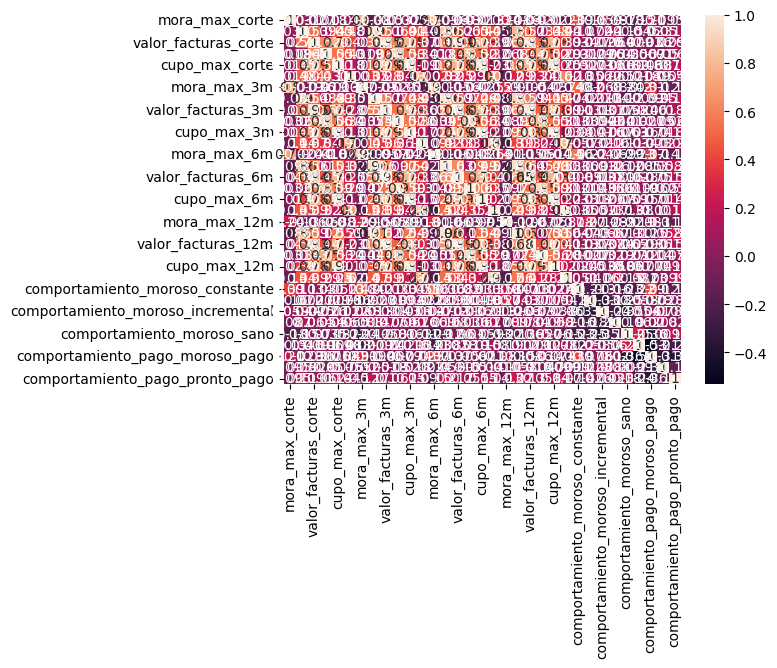

In [16]:
sns.heatmap(mdt.iloc[:, 1:].corr(), annot=True)

In [17]:
# 1. Calcular la matriz de correlación
correlation_matrix = mdt.iloc[:, 1:].corr()

# 2. Identificar las columnas con correlación mayor al 70%
highly_correlated_columns = set()  # Crear un conjunto para almacenar columnas a eliminar

# Iterar a través de la matriz de correlación
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > 0.7:  # 0.7 es el umbral del 70%
            colname = correlation_matrix.columns[i]
            highly_correlated_columns.add(colname)
print('Numero de columnas en la mdt:',mdt.shape[1])
print('Numero de columnas a eliminar:', len(highly_correlated_columns))
print('Numero de columnas resultantes:', mdt.shape[1] - len(highly_correlated_columns))
highly_correlated_columns


Numero de columnas en la mdt: 34
Numero de columnas a eliminar: 18
Numero de columnas resultantes: 16


{'cupo_max_12m',
 'cupo_max_3m',
 'cupo_max_6m',
 'cupo_max_corte',
 'mora_max_3m',
 'mora_max_6m',
 'num_facturas_12m',
 'num_facturas_3m',
 'num_facturas_6m',
 'porcentaje_uso_cupo_12m',
 'porcentaje_uso_cupo_3m',
 'porcentaje_uso_cupo_6m',
 'prom_facturas_12m',
 'prom_facturas_3m',
 'prom_facturas_6m',
 'valor_facturas_12m',
 'valor_facturas_3m',
 'valor_facturas_6m'}

In [18]:
# 3. Eliminar las columnas con correlación alta
mdt_new = mdt.drop(columns=highly_correlated_columns)
mdt_new.head()

,nit,mora_max_corte,num_facturas_corte,valor_facturas_corte,prom_facturas_corte,porcentaje_uso_cupo_corte,mora_max_12m,comportamiento_moroso_constante,comportamiento_moroso_decreciente,comportamiento_moroso_incremental,comportamiento_moroso_intermitente,comportamiento_moroso_sano,comportamiento_pago_dia_pago,comportamiento_pago_moroso_pago,comportamiento_pago_olvido_pago,comportamiento_pago_pronto_pago
0,10004337,0.0,7.0,11443080.0,1.634726e+06,114.430800,4.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,1000575488,0.0,1.0,425079.0,4.250790e+05,4.250790,5.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,10006035,0.0,3.0,2398149.0,7.993830e+05,28.959095,96.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,1000790988,23.0,3.0,4930550.0,1.643517e+06,42.504741,23.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
4,1000918720,34.0,2.0,5131057.0,2.565528e+06,17.103523,38.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [19]:
# Merge entre mdt y target
target['nit'] = target['nit'].astype(str)
mdt_new['nit'] = mdt_new['nit'].astype(str)

df = pd.merge(target, mdt_new, how='left', on='nit')
# NaN
df.iloc[:, 3:] = df.iloc[:, 3:].fillna(0)
print(df.shape)
df.head()

(1144, 18)


,nit,Dias vencidos,target,mora_max_corte,num_facturas_corte,valor_facturas_corte,prom_facturas_corte,porcentaje_uso_cupo_corte,mora_max_12m,comportamiento_moroso_constante,comportamiento_moroso_decreciente,comportamiento_moroso_incremental,comportamiento_moroso_intermitente,comportamiento_moroso_sano,comportamiento_pago_dia_pago,comportamiento_pago_moroso_pago,comportamiento_pago_olvido_pago,comportamiento_pago_pronto_pago
0,10004337,0,0,0.0,7.0,11443080.0,1.634726e+06,114.430800,4.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,1000575488,0,0,0.0,1.0,425079.0,4.250790e+05,4.250790,5.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,10006035,34,1,0.0,3.0,2398149.0,7.993830e+05,28.959095,96.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,1000790988,60,1,23.0,3.0,4930550.0,1.643517e+06,42.504741,23.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
4,1000918720,94,1,34.0,2.0,5131057.0,2.565528e+06,17.103523,38.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [20]:
df.isna().sum()

nit                                   0
Dias vencidos                         0
target                                0
mora_max_corte                        0
num_facturas_corte                    0
valor_facturas_corte                  0
prom_facturas_corte                   0
porcentaje_uso_cupo_corte             0
mora_max_12m                          0
comportamiento_moroso_constante       0
comportamiento_moroso_decreciente     0
comportamiento_moroso_incremental     0
comportamiento_moroso_intermitente    0
comportamiento_moroso_sano            0
comportamiento_pago_dia_pago          0
comportamiento_pago_moroso_pago       0
comportamiento_pago_olvido_pago       0
comportamiento_pago_pronto_pago       0
dtype: int64

In [21]:
df.columns

Index(['nit', 'Dias vencidos', 'target', 'mora_max_corte',
       'num_facturas_corte', 'valor_facturas_corte', 'prom_facturas_corte',
       'porcentaje_uso_cupo_corte', 'mora_max_12m',
       'comportamiento_moroso_constante', 'comportamiento_moroso_decreciente',
       'comportamiento_moroso_incremental',
       'comportamiento_moroso_intermitente', 'comportamiento_moroso_sano',
       'comportamiento_pago_dia_pago', 'comportamiento_pago_moroso_pago',
       'comportamiento_pago_olvido_pago', 'comportamiento_pago_pronto_pago'],
      dtype='object')

# Entrenando modelo

In [22]:
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

In [23]:
X = df[['mora_max_corte','num_facturas_corte', 'valor_facturas_corte', 'prom_facturas_corte','porcentaje_uso_cupo_corte', 'mora_max_12m',
        'comportamiento_moroso_constante', 'comportamiento_moroso_decreciente','comportamiento_moroso_incremental','comportamiento_moroso_intermitente', 
        'comportamiento_moroso_sano','comportamiento_pago_dia_pago', 'comportamiento_pago_moroso_pago','comportamiento_pago_olvido_pago', 
        'comportamiento_pago_pronto_pago']]
y = df[['target']]

In [24]:
# Dividir los datos en conjuntos de entrenamiento y validación (por ejemplo, 80% entrenamiento, 20% validación)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42)

# Muestra las formas (tamaños) de los conjuntos resultantes
print("Conjunto de entrenamiento - Características:", X_train.shape)
print("Conjunto de entrenamiento - Variable Objetivo:", y_train.shape)
print("Conjunto de validación - Características:", X_val.shape)
print("Conjunto de validación - Variable Objetivo:", y_val.shape)

Conjunto de entrenamiento - Características: (800, 15)
Conjunto de entrenamiento - Variable Objetivo: (800, 1)
Conjunto de validación - Características: (344, 15)
Conjunto de validación - Variable Objetivo: (344, 1)


## Arbol de clasificacion

Index(['valor_facturas_corte', 'prom_facturas_corte',
       'porcentaje_uso_cupo_corte', 'mora_max_12m'],
      dtype='object')


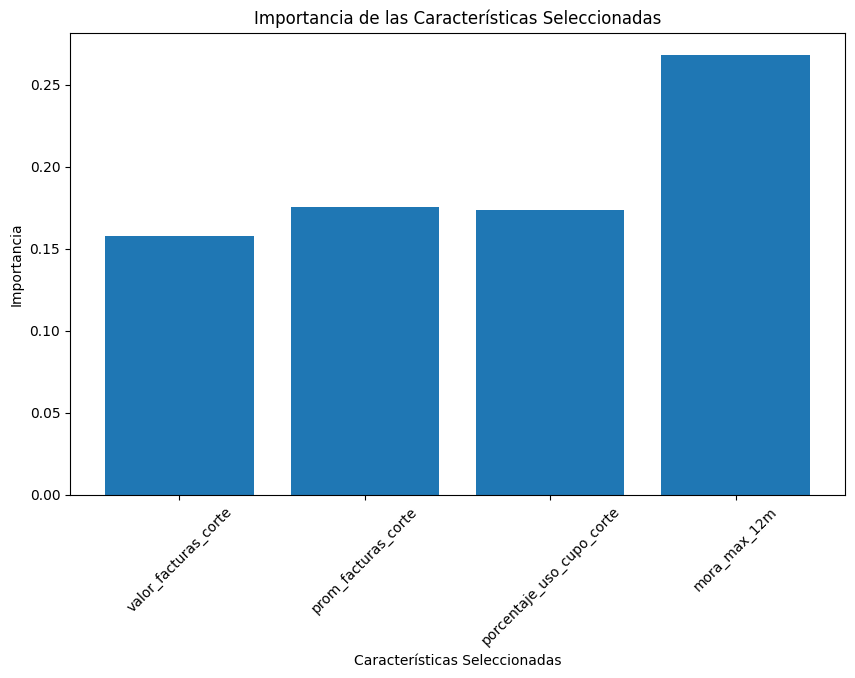

In [25]:
# Mejores variables
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
# Crear un selector de características basado en la importancia del modelo
sfm = SelectFromModel(clf, threshold='mean')  # Puedes ajustar el umbral según tus necesidades
# Obtener las características seleccionadas
selected_features = np.array(X.columns)[sfm.get_support()]
# Obtener la importancia de las características seleccionadas
feature_importance = clf.feature_importances_[sfm.get_support()]
print(X.columns[sfm.get_support(indices=True)])
# Crear un gráfico de barras para mostrar la importancia de las características seleccionadas
plt.figure(figsize=(10, 6))
plt.bar(selected_features, feature_importance)
plt.xlabel('Características Seleccionadas')
plt.ylabel('Importancia')
plt.title('Importancia de las Características Seleccionadas')
plt.xticks(rotation=45)
plt.show()

In [26]:
# Mejores hiperparametros
param_grid = {'criterion': ['gini', 'entropy', 'log_loss'],
                'splitter': ['best', 'random'],
                'max_depth': [2, 3, 4, 5, 6, 7, 8],
                'min_samples_split': [2, 3, 4, 5, 6, 7, 8]
}
grid_search = GridSearchCV(DecisionTreeClassifier(), param_grid)
grid_search.fit(X_train[['mora_max_corte', 'valor_facturas_corte', 'prom_facturas_corte','porcentaje_uso_cupo_corte', 'mora_max_12m']], y_train)
best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_

In [27]:
print(best_params)
print(best_estimator)

{'criterion': 'gini', 'max_depth': 2, 'min_samples_split': 2, 'splitter': 'best'}
DecisionTreeClassifier(max_depth=2)


In [28]:
# Entrenando modelo 
model = best_estimator
model = model.fit(X_train[['mora_max_corte', 'valor_facturas_corte', 'prom_facturas_corte','porcentaje_uso_cupo_corte', 'mora_max_12m']], y_train)
#y_pred = model.predict(X_train[['mora_max_corte', 'valor_facturas_corte', 'prom_facturas_corte','porcentaje_uso_cupo_corte', 'mora_max_12m']])
y_prob = model.predict_proba(X_train[['mora_max_corte', 'valor_facturas_corte', 'prom_facturas_corte','porcentaje_uso_cupo_corte', 'mora_max_12m']])[:, 1]
y_pred = (y_prob > 0.35).astype(int)
# Imprimir el informe de clasificación
classification_rep = classification_report(y_train, y_pred)
print("Informe de Clasificación:/n", classification_rep)


Informe de Clasificación:/n               precision    recall  f1-score   support

           0       0.70      0.83      0.76       459
           1       0.69      0.51      0.59       341

    accuracy                           0.69       800
   macro avg       0.69      0.67      0.67       800
weighted avg       0.69      0.69      0.69       800



<Axes: >

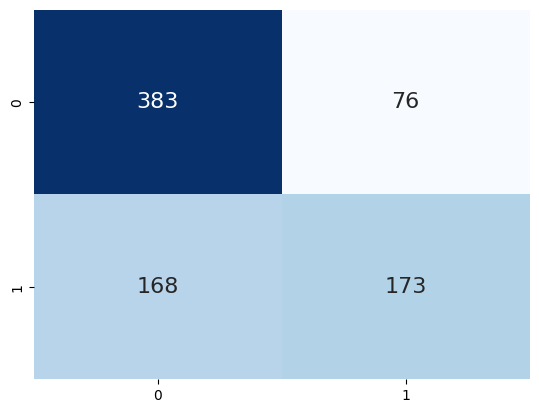

In [29]:
sns.heatmap(metrics.confusion_matrix(y_train, y_pred), annot=True, annot_kws={"size": 16}, fmt='d', cmap='Blues', cbar=False)

Umbral Óptimo: 0.65
Coordenadas del Punto Óptimo (FPR, TPR): (0.17, 0.51)


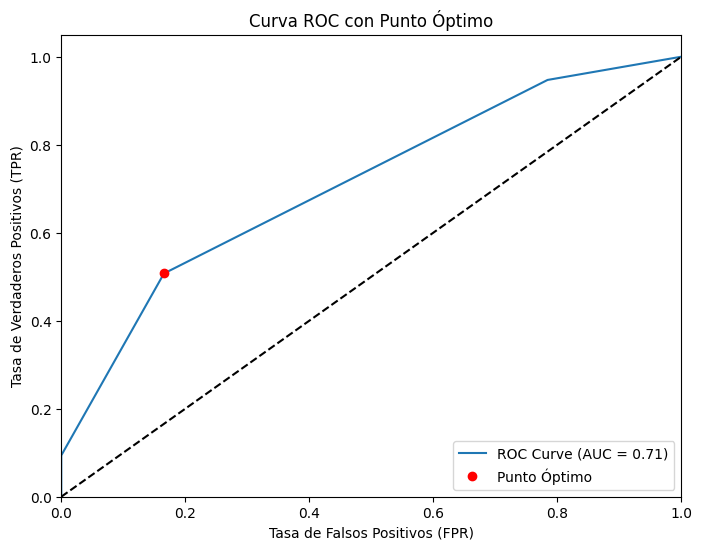

AUC: 0.71
Punto Óptimo: 0.65


In [30]:
# Calcular las probabilidades de las clases positivas
y_prob = model.predict_proba(X_train[['mora_max_corte', 'valor_facturas_corte', 'prom_facturas_corte','porcentaje_uso_cupo_corte', 'mora_max_12m']])[:, 1]
# Calcular la curva ROC
fpr, tpr, thresholds = roc_curve(y_train, y_prob)
# Calcular el AUC
auc = roc_auc_score(y_train, y_prob)
# Encontrar el umbral óptimo (puedes personalizar la métrica aquí)
optimal_threshold_index = (tpr - fpr).argmax()
optimal_threshold = thresholds[optimal_threshold_index]
# Obtener las coordenadas (FPR, TPR) del punto óptimo
optimal_fpr = fpr[optimal_threshold_index]
optimal_tpr = tpr[optimal_threshold_index]
# Imprimir el umbral óptimo y las coordenadas del punto óptimo
print(f'Umbral Óptimo: {optimal_threshold:.2f}')
print(f'Coordenadas del Punto Óptimo (FPR, TPR): ({optimal_fpr:.2f}, {optimal_tpr:.2f})')
# Crear y mostrar la curva ROC con el punto óptimo
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc:.2f})')
plt.plot(optimal_fpr, optimal_tpr, 'ro', label='Punto Óptimo')
plt.plot([0, 1], [0, 1], 'k--')  # Línea de referencia diagonal
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Curva ROC con Punto Óptimo')
plt.legend(loc="lower right")
plt.show()
# Imprimir el valor del AUC
print(f'AUC: {auc:.2f}')
print(f'Punto Óptimo: {optimal_threshold:.2f}')

Index(['mora_max_corte', 'valor_facturas_corte', 'prom_facturas_corte',
       'porcentaje_uso_cupo_corte', 'mora_max_12m'],
      dtype='object')


C:\Users\Aleja\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


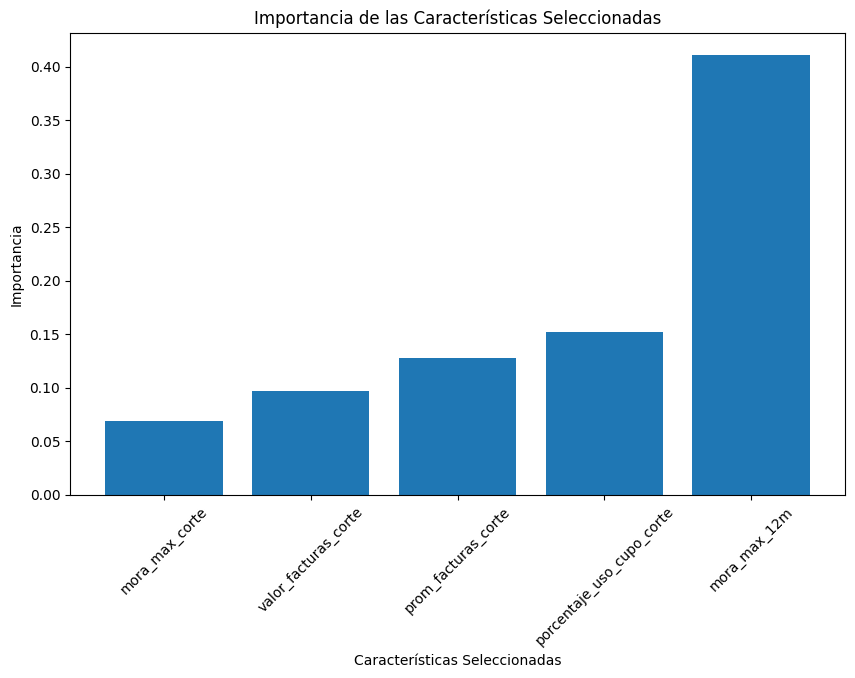

In [31]:
# Mejores variables
clf = GradientBoostingClassifier()
clf.fit(X_train, y_train)
# Crear un selector de características basado en la importancia del modelo
sfm = SelectFromModel(clf, threshold='mean')  # Puedes ajustar el umbral según tus necesidades
# Obtener las características seleccionadas
selected_features = np.array(X.columns)[sfm.get_support()]
# Obtener la importancia de las características seleccionadas
feature_importance = clf.feature_importances_[sfm.get_support()]
print(X.columns[sfm.get_support(indices=True)])
# Crear un gráfico de barras para mostrar la importancia de las características seleccionadas
plt.figure(figsize=(10, 6))
plt.bar(selected_features, feature_importance)
plt.xlabel('Características Seleccionadas')
plt.ylabel('Importancia')
plt.title('Importancia de las Características Seleccionadas')
plt.xticks(rotation=45)
plt.show()

In [32]:
# Mejores hiperparametros
param_grid = {'loss':['log_loss', 'exponential'],
              'criterion':['friedman_mse','squared_error'],
    'n_estimators': [50, 100],           # Número de estimadores (árboles)
    'learning_rate': [0.01, 0.1],       # Tasa de aprendizaje
    'max_depth': [3, 4, 5],                  # Profundidad máxima de los árboles
    'min_samples_split': [2, 3, 4],          # Mínimo de muestras requeridas para dividir un nodo
    'min_samples_leaf': [1, 2, 3],           # Mínimo de muestras requeridas en una hoja
    'subsample': [0.8, 1.0]             # Tasa de submuestreo de las muestras
}
grid_search = GridSearchCV(GradientBoostingClassifier(), param_grid)
grid_search.fit(X_train[['mora_max_corte', 'valor_facturas_corte', 'prom_facturas_corte','porcentaje_uso_cupo_corte', 'mora_max_12m']], y_train)
best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_

C:\Users\Aleja\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Aleja\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Aleja\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please chang

In [33]:
print(best_params)
print(best_estimator)

{'criterion': 'friedman_mse', 'learning_rate': 0.01, 'loss': 'exponential', 'max_depth': 4, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50, 'subsample': 1.0}
GradientBoostingClassifier(learning_rate=0.01, loss='exponential', max_depth=4,
                           n_estimators=50)


In [34]:
# Entrenando modelo 
model = GradientBoostingClassifier()
model = model.fit(X_train[['mora_max_corte', 'valor_facturas_corte', 'prom_facturas_corte','porcentaje_uso_cupo_corte', 'mora_max_12m']], y_train)
#y_pred = model.predict(X_train[['mora_max_corte', 'valor_facturas_corte', 'prom_facturas_corte','porcentaje_uso_cupo_corte', 'mora_max_12m']])
y_prob = model.predict_proba(X_train[['mora_max_corte', 'valor_facturas_corte', 'prom_facturas_corte','porcentaje_uso_cupo_corte', 'mora_max_12m']])[:, 1]
y_pred = (y_prob > 0.41).astype(int)
# Imprimir el informe de clasificación
classification_rep = classification_report(y_train, y_pred)
print("Informe de Clasificación:/n", classification_rep)


Informe de Clasificación:/n               precision    recall  f1-score   support

           0       0.87      0.84      0.85       459
           1       0.79      0.83      0.81       341

    accuracy                           0.83       800
   macro avg       0.83      0.83      0.83       800
weighted avg       0.84      0.83      0.84       800



C:\Users\Aleja\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


<Axes: >

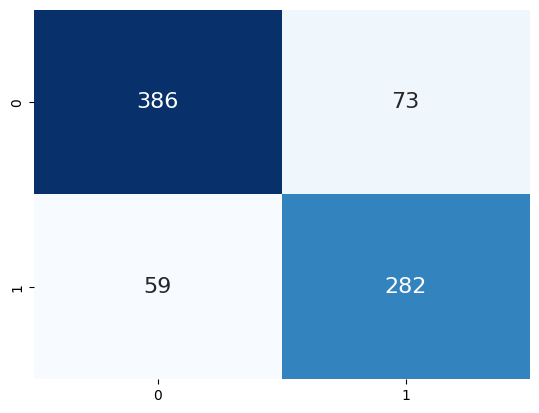

In [35]:
sns.heatmap(metrics.confusion_matrix(y_train, y_pred), annot=True, annot_kws={"size": 16}, fmt='d', cmap='Blues', cbar=False)

Umbral Óptimo: 0.41
Coordenadas del Punto Óptimo (FPR, TPR): (0.16, 0.84)


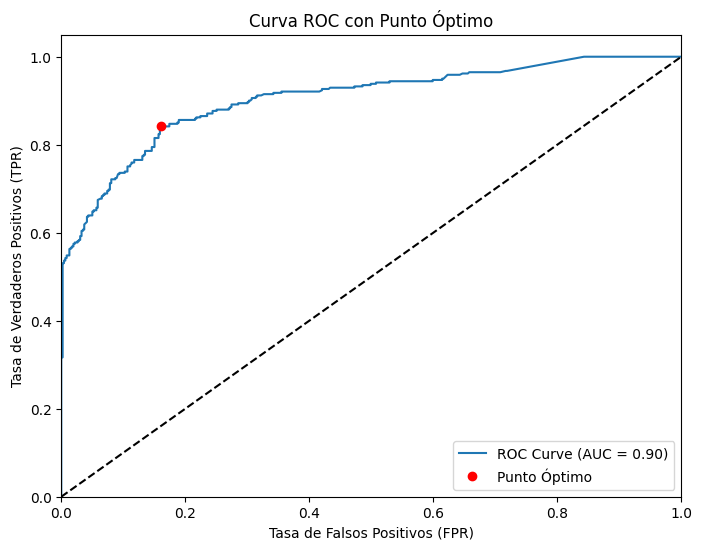

AUC: 0.90
Punto Óptimo: 0.41


In [36]:
# Calcular las probabilidades de las clases positivas
y_prob = model.predict_proba(X_train[['mora_max_corte', 'valor_facturas_corte', 'prom_facturas_corte','porcentaje_uso_cupo_corte', 'mora_max_12m']])[:, 1]
# Calcular la curva ROC
fpr, tpr, thresholds = roc_curve(y_train, y_prob)
# Calcular el AUC
auc = roc_auc_score(y_train, y_prob)
# Encontrar el umbral óptimo (puedes personalizar la métrica aquí)
optimal_threshold_index = (tpr - fpr).argmax()
optimal_threshold = thresholds[optimal_threshold_index]
# Obtener las coordenadas (FPR, TPR) del punto óptimo
optimal_fpr = fpr[optimal_threshold_index]
optimal_tpr = tpr[optimal_threshold_index]
# Imprimir el umbral óptimo y las coordenadas del punto óptimo
print(f'Umbral Óptimo: {optimal_threshold:.2f}')
print(f'Coordenadas del Punto Óptimo (FPR, TPR): ({optimal_fpr:.2f}, {optimal_tpr:.2f})')
# Crear y mostrar la curva ROC con el punto óptimo
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc:.2f})')
plt.plot(optimal_fpr, optimal_tpr, 'ro', label='Punto Óptimo')
plt.plot([0, 1], [0, 1], 'k--')  # Línea de referencia diagonal
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Curva ROC con Punto Óptimo')
plt.legend(loc="lower right")
plt.show()
# Imprimir el valor del AUC
print(f'AUC: {auc:.2f}')
print(f'Punto Óptimo: {optimal_threshold:.2f}')

In [37]:
# Metricas de validacion
y_prob = model.predict_proba(X_val[['mora_max_corte', 'valor_facturas_corte', 'prom_facturas_corte','porcentaje_uso_cupo_corte', 'mora_max_12m']])[:, 1]
y_pred = (y_prob > 0.3987341772151899).astype(int)
# Imprimir el informe de clasificación
classification_rep = classification_report(y_val, y_pred)
print("Informe de Clasificación:/n", classification_rep)

Informe de Clasificación:/n               precision    recall  f1-score   support

           0       0.64      0.57      0.60       186
           1       0.55      0.63      0.59       158

    accuracy                           0.60       344
   macro avg       0.60      0.60      0.60       344
weighted avg       0.60      0.60      0.60       344



<Axes: >

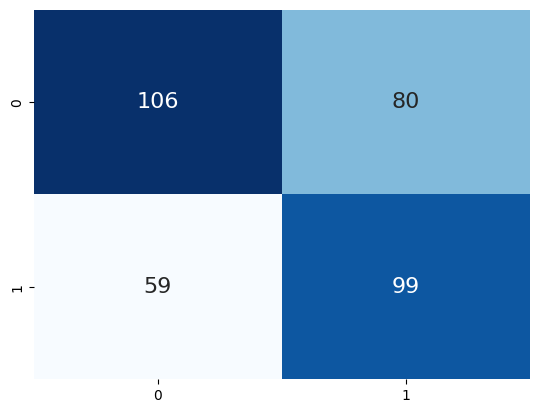

In [38]:
sns.heatmap(metrics.confusion_matrix(y_val, y_pred), annot=True, annot_kws={"size": 16}, fmt='d', cmap='Blues', cbar=False)

In [39]:
# Calcular la curva ROC
fpr, tpr, thresholds = roc_curve(y_val, y_prob)
# Encontrar el umbral óptimo (puedes personalizar la métrica aquí)
optimal_threshold_index = (tpr - fpr).argmax()
optimal_threshold = thresholds[optimal_threshold_index]
# Obtener las coordenadas (FPR, TPR) del punto óptimo
optimal_fpr = fpr[optimal_threshold_index]
optimal_tpr = tpr[optimal_threshold_index]
optimal_tpr

np.float64(0.3670886075949367)